# SVM fitting on real data

### Imports and set seed for reproducibility

In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Set the random seed for reproducibility.
seed = 16
random.seed(seed)
np.random.seed(seed)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import time

# Import SVM from the ado library.
from ado import SVM

### Load the occupancy training and test data

In [3]:
training_data = pd.read_csv('../data/occupancy/datatraining.csv')
# Shuffle the training data.
training_data.sample(frac=1)

x_train = training_data.iloc[:,:5].to_numpy()
y_train = training_data.iloc[:,5].to_numpy()

test_data = pd.read_csv('../data/occupancy/datatest2.csv')
# Shuffle the training data.
test_data.sample(frac=1)

x_test = test_data.iloc[:,:5].to_numpy()
y_test= test_data.iloc[:,5].to_numpy()

print(f"Number of training samples: {len(x_train)}")
print(f"Number of test samples: {len(x_test)}")

Number of training samples: 8142
Number of test samples: 9751


### Normalize the data to 0-1 range and set labels to -1,+1

In [4]:
def normalize(x:np.array):
    return (x.astype(float) - np.min(x)) / (np.max(x) - np.min(x))

x_train = normalize(x_train)
y_train[y_train == 0] = -1

x_test = normalize(x_test)
y_test[y_test == 0] = -1

### Project the 5 dimensional data into 2 dimensions by using PCA

In [5]:
x_train_2_components = PCA(n_components=2, random_state=16).fit_transform(x_train)
x_test_2_components = PCA(n_components=2, random_state=16).fit_transform(x_test)

### Fit the SVM on the training data

In [6]:
model = SVM(C=1.0, tol=1e-3, kernel='polynomial', max_steps=1, seed=seed)

start = time.time()

# Fit the model.
model.fit(x_train_2_components, y_train)

end = time.time()
print(f"Elapsed time: {round(end - start,2)} s.")

Elapsed time: 16.69 s.


### Run inference and compute accuracy

In [7]:
y_pred = model.predict(x_test_2_components)

print(f"Accuracy: {np.round(np.sum(y_pred == y_test)/len(x_test)*100,2)} %")

Accuracy: 93.38 %


### Plot predictions

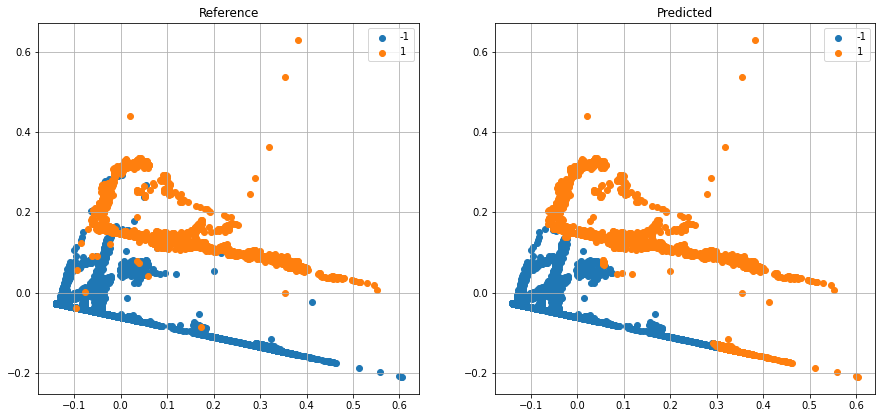

In [8]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.title.set_text('Reference')
for y_value in np.unique(y_test):
    ix = np.where(y_test == y_value)
    ax1.scatter(x_test_2_components[ix,0], x_test_2_components[ix,1], label = y_value)
ax1.legend()
ax1.grid()
    
ax2.title.set_text('Predicted')
for y_value in np.unique(y_test):
    ix = np.where(y_pred == y_value)
    ax2.scatter(x_test_2_components[ix,0], x_test_2_components[ix,1], label = y_value)
ax2.legend()
ax2.grid()

plt.show()